In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
# plt.rcParams={'figsize.figure': (15, 10)}

pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [2]:
df = pd.read_csv('kaggle_survey_2020_responses.csv')

df.shape

(20037, 355)

In [3]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [4]:
question = df.iloc[0]
len(question)

355

In [5]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [8]:
df = df.drop(0, axis=0)

KeyError: '[0] not found in axis'

In [9]:
df['Time from Start to Finish (seconds)'] = df['Time from Start to Finish (seconds)'].astype('int32')

In [11]:
#  let try remove the outliers
mean = df['Time from Start to Finish (seconds)'].mean()
std = df['Time from Start to Finish (seconds)'].std()

cut_off = std * 3

lower, upper = mean-cut_off, mean+cut_off
new_df = df[(df['Time from Start to Finish (seconds)']<upper)& (df['Time from Start to Finish (seconds)']>lower)]

print(new_df.shape, df.shape)

(19825, 355) (20036, 355)


<AxesSubplot:>

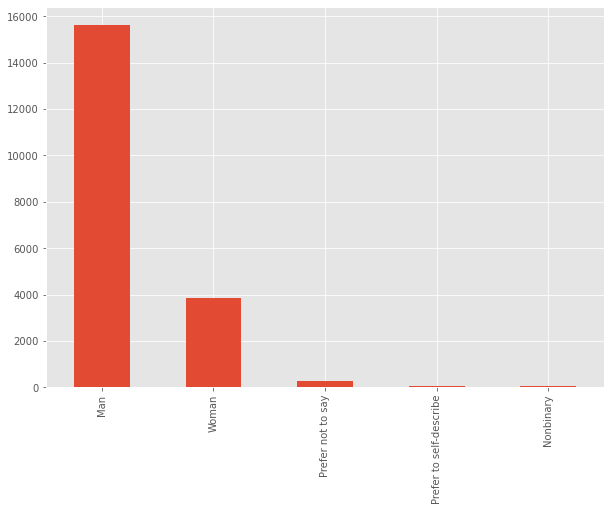

In [12]:
new_df['Q2'].value_counts().plot(kind='bar', figsize=(10, 7))

<AxesSubplot:ylabel='Frequency'>

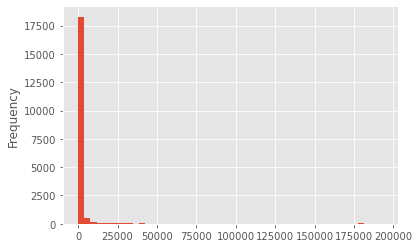

In [13]:
new_df['Time from Start to Finish (seconds)'].plot.hist(bins=50)

In [15]:
print(f"The highest amount of time taken by a respondent to fill the survey was :{new_df['Time from Start to Finish (seconds)'].max() / 60}")

The highest amount of time taken by a respondent to fill the survey was :3218.95


In [16]:
print(f"The lowest amount of time taken by a respondent to fill the survey was :{new_df['Time from Start to Finish (seconds)'].min() / 60}")

The lowest amount of time taken by a respondent to fill the survey was :0.3333333333333333


Given the amount of questions asked in the survey 20 seconds to fill out all question was probably not realistic, we can dig deeper and see whether all others question were actually answered.

for me a more adequate survey would take you approx 5min given the number of questions and 5 min = 300seconds

so all answers that is less than this would be removed dropped

In [18]:
new_df[new_df['Time from Start to Finish (seconds)']==20]

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

Wasn't filled at all

We can dicide to set a threshold of 5min minimum to fill survey with real genuinity. thats 300 seconds right?

Now spending more than a day to fill the survey is just not right for me i will drop anything greater than 86400 seconds

In [24]:
print(new_df.shape[0])
new_df = new_df[(new_df['Time from Start to Finish (seconds)']>= 300)]
new_df = new_df[(new_df['Time from Start to Finish (seconds)'] <= 86400)]
print(new_df.shape[0])

19825
16234


About 3k response was dropped, let move on

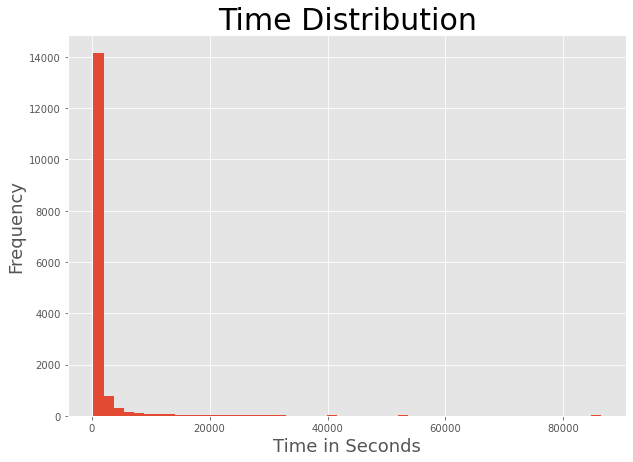

In [26]:
# Let look at the distribution of the times
plt.figure(figsize=(10,7))
new_df['Time from Start to Finish (seconds)'].plot.hist(bins=50)
plt.xlabel('Time in Seconds', fontsize=18); plt.ylabel('Frequency', fontsize=18); 
plt.title('Time Distribution', size=30)
plt.show()

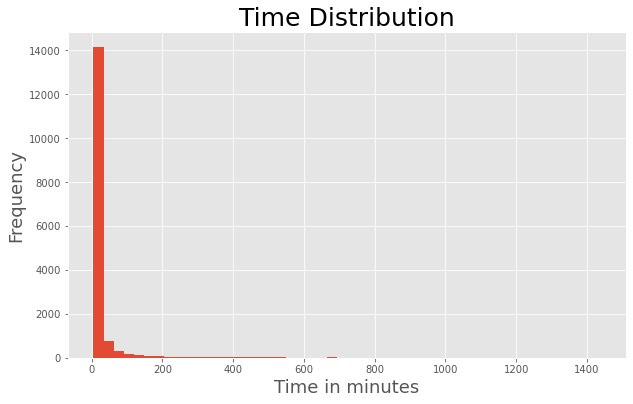

In [28]:
# let convert the time from seconds to minutes
plt.figure(figsize=(10,6))
new_df['Time from Start to Finish (minutes)'] = new_df['Time from Start to Finish (seconds)'] / 60
new_df['Time from Start to Finish (minutes)'].plot.hist(bins=50)
plt.xlabel('Time in minutes', fontsize=18); plt.ylabel('Frequency', fontsize=18); 
plt.title('Time Distribution', size=25)
plt.show()

looks like more than 70% of respondent spend less than 1hr

We can say that respondent that spend more than 500 minutes probably forgot they started the survey already and time was counting on

Let explore the sex distribution

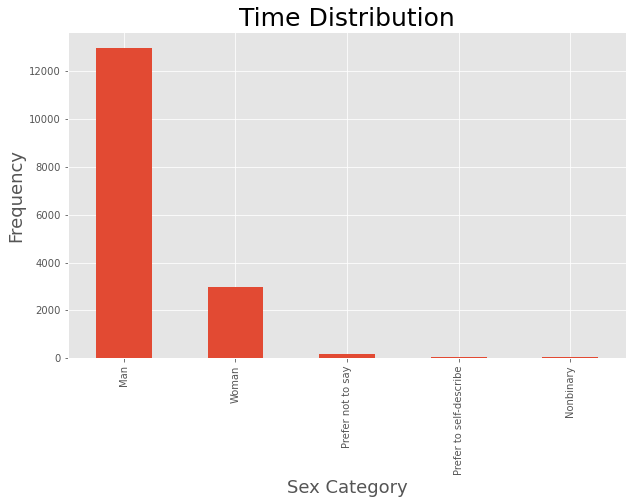

In [29]:
plt.figure(figsize=(10,6))
new_df['Q2'].value_counts().plot(kind='bar')
plt.xlabel('Sex Category', fontsize=18); plt.ylabel('Frequency', fontsize=18); 
plt.title('Time Distribution', size=25)
plt.show()

let see the distribution of time as spent by each sex category

In [30]:
sex_time_avg = new_df.groupby('Q2')['Time from Start to Finish (minutes)'].mean()
sex_time_avg

Q2
Man                        37.241548
Nonbinary                  61.561966
Prefer not to say          30.355122
Prefer to self-describe    13.813043
Woman                      44.501105
Name: Time from Start to Finish (minutes), dtype: float64

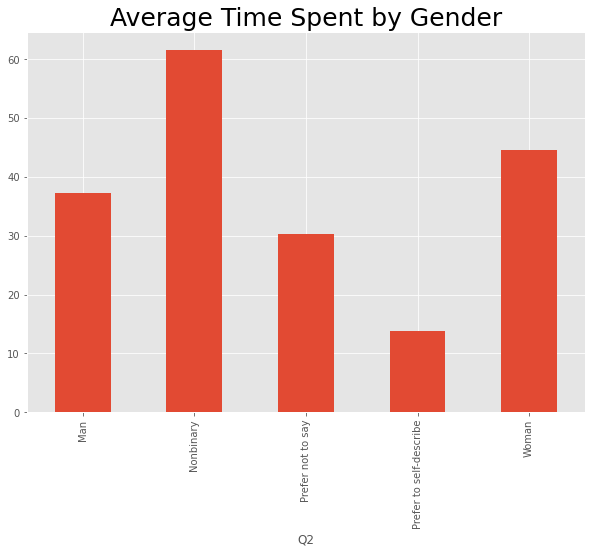

In [31]:
sex_time_avg.plot.bar(figsize=(10,7))
plt.title('Average Time Spent by Gender', size=25)
plt.show()

On Average, Nonniary Category spends 61.5 minutes to complete the survey

Woman spends 44.5 minutes and Man spends 37 minutes

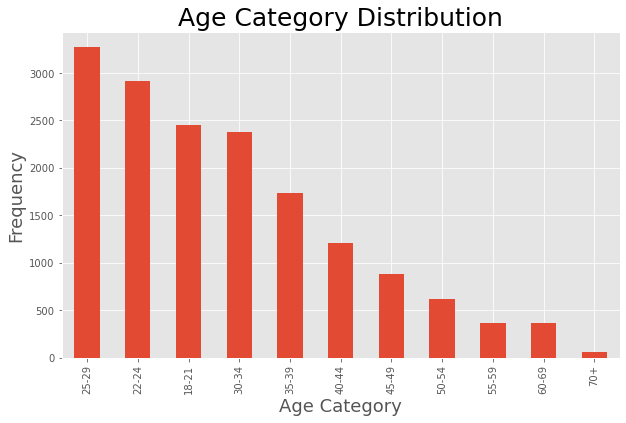

In [33]:
new_df['Q1'].value_counts().plot.bar(figsize=(10,6))
plt.title('Age Category Distribution', size=25)
plt.xlabel('Age Category', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

Generally, we have a much younger respondents

Let test this theory>>>> Thoery is older people spends the highest time to fill the survey

By older people Age category 60-69 upwards

let see :laugh:

In [35]:
age_per_time = new_df.groupby(['Q1'])['Time from Start to Finish (minutes)'].mean().sort_values(ascending=False)
age_per_time

Q1
45-49    44.543634
40-44    41.005331
25-29    40.540714
35-39    39.995593
30-34    38.059627
22-24    37.451965
18-21    36.042814
50-54    35.856417
55-59    33.135958
60-69    29.905309
70+      21.923118
Name: Time from Start to Finish (minutes), dtype: float64

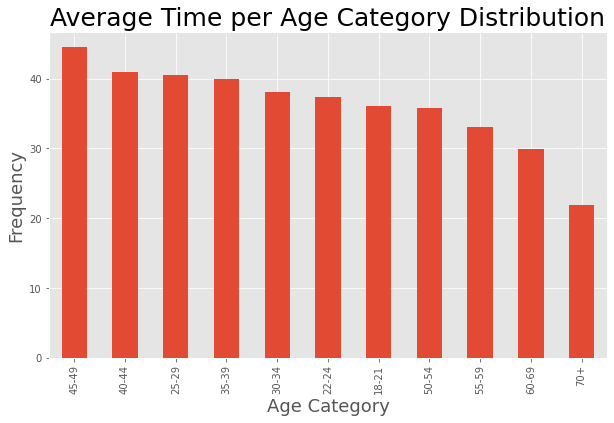

In [36]:
age_per_time.plot.bar(figsize=(10, 6))
plt.title('Average Time per Age Category Distribution', size=25)
plt.xlabel('Age Category', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

Well, My Theory ain't quite right yes? of course Infact it is the exact opposite people with age range 60 above spends the smallest time on average to fill the survey. AMAZING 

Q3: In which country do you currently reside?

<AxesSubplot:>

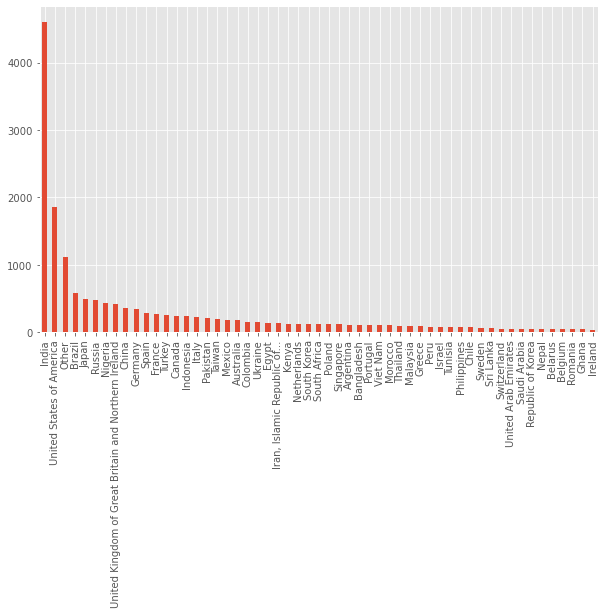

In [38]:
new_df['Q3'].value_counts().plot(kind='bar', figsize=(10, 6))

India was the most represented country amongst respondents who filled the survey

In [41]:
# let pick the top 15 countries yes?
countries_count = new_df['Q3'].value_counts()

top_15_countries = countries_count.head(15)
top_15_countries

India                                                   4604
United States of America                                1856
Other                                                   1124
Brazil                                                   585
Japan                                                    497
Russia                                                   484
Nigeria                                                  429
United Kingdom of Great Britain and Northern Ireland     422
China                                                    356
Germany                                                  342
Spain                                                    291
France                                                   268
Turkey                                                   255
Canada                                                   245
Indonesia                                                239
Name: Q3, dtype: int64

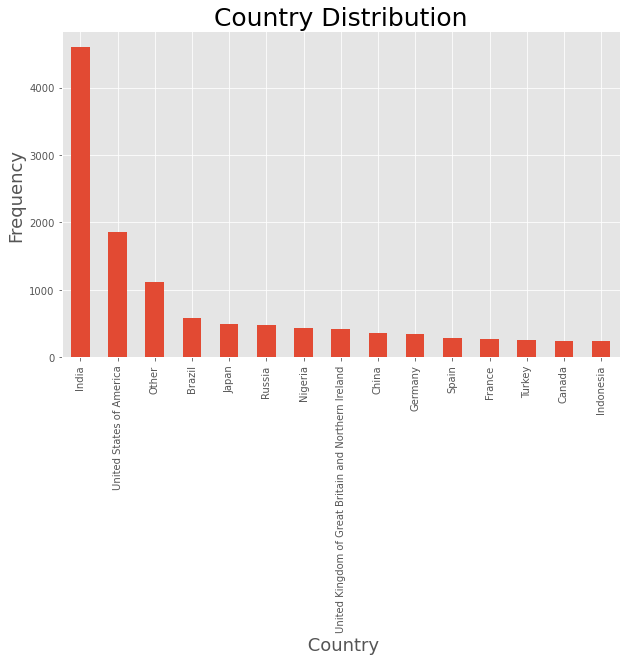

In [42]:
top_15_countries.plot.bar(figsize=(10,6))
plt.title('Country Distribution', size=25)
plt.xlabel(' Country', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

What is the average time spent per country?

In [46]:
country_avg_time = new_df.groupby('Q3')['Time from Start to Finish (minutes)'].mean().sort_values(ascending=False)

In [68]:
from IPython.display import display
print('Countries and the Average Time Spent to complete the form(minutes)\n\n')
for country in country_avg_time.index:
    print(f'Respondents from "{country}" Spends "{country_avg_time[country]}"\n')

Countries and the Average Time Spent to complete the form(minutes)


Respondents from "Peru" Spends "68.65440613026816"

Respondents from "Tunisia" Spends "65.30662650602409"

Respondents from "China" Spends "61.7817415730338"

Respondents from "Ghana" Spends "60.0786231884058"

Respondents from "Malaysia" Spends "54.438659793814416"

Respondents from "Mexico" Spends "53.073456790123494"

Respondents from "Turkey" Spends "52.63882352941174"

Respondents from "United Arab Emirates" Spends "52.3269696969697"

Respondents from "Australia" Spends "47.49889502762431"

Respondents from "Bangladesh" Spends "47.20193452380955"

Respondents from "Egypt" Spends "46.3243498817967"

Respondents from "Argentina" Spends "45.50781710914455"

Respondents from "Morocco" Spends "45.439465408805034"

Respondents from "Belarus" Spends "45.34266666666665"

Respondents from "Greece" Spends "44.229964539007085"

Respondents from "Romania" Spends "42.55850340136054"

Respondents from "Sri Lanka" Spends "42.49

On Average Belgium spends 13 minutes to complete the survey which is the lowest with Peru having 68.6 minutes has the highest time spent to complete the survey. Tunisia follows closely with 65.3 minutes and China 61.7 minutes

In [71]:
country_per_gender = pd.crosstab(new_df['Q2'], new_df['Q3'])
country_per_gender

Q3,Argentina,Australia,Bangladesh,Belarus,Belgium,Brazil,Canada,Chile,China,Colombia,Egypt,France,Germany,Ghana,Greece,India,Indonesia,"Iran, Islamic Republic of...",Ireland,Israel,Italy,Japan,Kenya,Malaysia,Mexico,Morocco,Nepal,Netherlands,Nigeria,Other,Pakistan,Peru,Philippines,Poland,Portugal,Republic of Korea,Romania,Russia,Saudi Arabia,Singapore,South Africa,South Korea,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Viet Nam
Q2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Man,95,145,95,37,42,513,186,67,294,140,106,219,282,38,84,3585,167,88,25,67,201,459,107,53,164,86,45,104,354,908,180,72,52,102,80,50,40,414,44,94,102,100,250,47,58,45,160,77,50,190,129,46,336,1406,91
Nonbinary,0,2,0,0,0,1,0,0,2,0,0,0,1,0,0,2,1,0,1,0,0,0,0,1,1,0,0,0,1,3,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,15,0
Prefer not to say,3,5,0,1,0,0,4,1,9,0,0,4,7,1,0,40,5,1,0,2,2,4,3,1,1,0,0,4,1,22,0,0,3,2,0,0,0,5,1,2,0,1,3,0,1,0,3,1,0,3,1,0,6,39,0
Prefer to self-describe,0,2,0,0,0,0,0,0,3,0,0,2,2,0,1,11,1,0,1,0,0,0,0,0,0,1,0,1,0,6,0,0,0,0,1,0,0,2,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1,5,0
Woman,15,27,17,12,7,71,55,6,48,15,35,43,50,7,9,966,65,48,14,14,25,34,21,42,23,19,6,18,73,185,36,15,20,19,28,2,9,61,9,22,21,24,37,22,12,11,41,22,33,59,21,9,76,391,16


Which country has the highest number of young old people?

In [79]:
country_per_age = new_df.groupby(['Q1','Q3'])['Q3'].size().reset_index(name='Count')

In [80]:
country_per_age = pd.DataFrame(country_per_age)
country_per_age

,Q1,Q3,Count
0,18-21,Argentina,3
1,18-21,Australia,7
2,18-21,Bangladesh,19
3,18-21,Belarus,7
4,18-21,Belgium,1
5,18-21,Brazil,38
6,18-21,Canada,7
7,18-21,Chile,1
8,18-21,China,75
9,18-21,Colombia,7


In [81]:
country_per_age.rename(columns={'Q1':'Age Range', 'Q3': 'Country'},inplace=True)

In [82]:
country_per_age

,Age Range,Country,Count
0,18-21,Argentina,3
1,18-21,Australia,7
2,18-21,Bangladesh,19
3,18-21,Belarus,7
4,18-21,Belgium,1
5,18-21,Brazil,38
6,18-21,Canada,7
7,18-21,Chile,1
8,18-21,China,75
9,18-21,Colombia,7


In [83]:
country_per_age[country_per_age['Country'] == 'Nigeria']

,Age Range,Country,Count
27,18-21,Nigeria,78
80,22-24,Nigeria,109
135,25-29,Nigeria,104
190,30-34,Nigeria,58
245,35-39,Nigeria,40
299,40-44,Nigeria,18
351,45-49,Nigeria,17
401,50-54,Nigeria,4
483,60-69,Nigeria,1


There are just 1 old person from Nigeria, atleast by my definition of old 

In [ ]:
country_per